In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
from scipy.stats import pearsonr
from scipy.stats import spearmanr


In [8]:
# tensor data:
file_dir = 'research_data'
file_name = 'subs_data_mean__all_0_0.pkl'
with open(os.path.join(file_dir, file_name), 'rb') as f:
    a = pickle.load(f)   
file_name = 'subs_data_median__all_0_0.pkl'
with open(os.path.join(file_dir, file_name), 'rb') as f:
    a1 = pickle.load(f)
    
file_name = 'subs_data_mean__all_0_0_xy.pkl'
with open(os.path.join(file_dir, file_name), 'rb') as f:
    a2 = pickle.load(f)
file_name = 'subs_data_mean__all_0_0_xy_pose.pkl'
with open(os.path.join(file_dir, file_name), 'rb') as f:
    a3 = pickle.load(f)
file_name = 'subs_data_mean__all_0_0_xyz_pose.pkl'
with open(os.path.join(file_dir, file_name), 'rb') as f:
    a4 = pickle.load(f)
    
file_name = 'subs_data_mean_4D_to_3D__all_0_0_xy_pose.pkl'
with open(os.path.join(file_dir, file_name), 'rb') as f:
    a5 = pickle.load(f) 
file_name = 'subs_data_mean_4D_to_3D__all_0_0_xyz.pkl'
with open(os.path.join(file_dir, file_name), 'rb') as f:
    a6 = pickle.load(f) 
    
    
    

    
    
# leave one subject CV accuracy:
file_name = 'Accuracy__tucker_tn__LR.pkl'
with open(os.path.join(file_dir, file_name), 'rb') as f:
    b0 = pickle.load(f)
file_name = 'Accuracy__tucker_tn__RF.pkl'
with open(os.path.join(file_dir, file_name), 'rb') as f:
    b1 = pickle.load(f)
    
file_name = 'Accuracy__tucker_tn__XGB.pkl'
with open(os.path.join(file_dir, file_name), 'rb') as f:
    b2 = pickle.load(f)
file_name = 'Accuracy__tucker_tn__SVM.pkl'
with open(os.path.join(file_dir, file_name), 'rb') as f:
    b3 = pickle.load(f)
    
file_name = 'Accuracy__tucker_tn__STMM.pkl'
with open(os.path.join(file_dir, file_name), 'rb') as f:
    b4 = pickle.load(f)
    
# Gender:
# gender = ['male', 'male', 'female', 'female', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'female',
#           'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male',]
# gender = np.array(gender) == 'male'
gender_str  = '''Male Male Female Female Male Male Female Female Female Female Female Male
Female Male Female Female Male Male Male Male Male'''
gender = gender_str.split()
gender = np.array(gender) == 'Male'
gender = gender.astype(np.int64)

In [4]:
(gender == 1).sum()

11

In [12]:
def load_data(src):
    data_ = np.load(src, allow_pickle=True)
    nan = 0
    data = {}
    for key in ['x_train', 'x_test', 'y_train', 'y_test']:
        data[key] = data_[key]
        if np.isnan(data[key]).sum() > 0:
            data[key] = np.nan_to_num(data[key], nan=nan, posinf=nan)
            print(f'For {key} nan will be replaced by {nan}!')
    return data

In [17]:
ls stages/data/initial_and_old

skgest-mpipe-center-folds/           skgest-ntu-center-folds/
skgest-mpipe-center.npz              skgest-ntu-center.npz
skgest-mpipe-center_SVD_max.npz      skgest-smpl-center-folds/
skgest-mpipe-center_tucker_full.npz  skgest-smpl-center.npz


In [18]:
src = 'stages/data/initial_and_old' + '/' + 'skgest-mpipe-center.npz'
data_ = np.load(src, allow_pickle=True)

In [87]:

data = data_['x_train']
np.isnan(data).sum()

2180817

In [89]:
data_ = ffill_nans(data)
np.isnan(data_).sum()

0

In [92]:
f"{'ffil':.0f}"

ValueError: Unknown format code 'f' for object of type 'str'

In [100]:
nan = 'ffil'
try:
    nan = float(nan)
except:
    nan = nan
nan

'ffil'

In [45]:
k = 30*3
(data_f[900:2000, :, :k] != data[900:2000, :, :k]).sum()

90

In [88]:

def ffill_nans(data_3D, table_axis=0):
    data = data_3D.copy()
    for i in range(data.shape[0]):
        df = pd.DataFrame(data[i])
        df.fillna(method='ffill', inplace=True, axis=table_axis)
        df.fillna(value=0, inplace=True)
        data[i] = df.to_numpy()
    return data

In [81]:
df[198][df[198].isna()].index

Int64Index([25, 27, 28, 29, 86], dtype='int64')

In [86]:
df[198][24:30]

24    0.4397
25    0.4397
26    0.4433
27    0.4433
28    0.4433
29    0.4433
Name: 198, dtype: float32

In [11]:
a_ = a5
r, p = pearsonr(gender, a_)
print(f'Pearson: {r:.3f} (p={p:.4f})')
r, p = spearmanr(gender, a_)
print(f'Spearman: {r:.3f} (p={p:.4f})')

Pearson: 0.600 (p=0.0040)
Spearman: 0.598 (p=0.0042)


In [85]:
for i, b_ in enumerate([b0, b1, b2, b3, b4]):
    print(f"b{i}: ", np.corrcoef(a3, b_)[1,0])
    

b0:  0.16948778552961663
b1:  0.15824212052758782
b2:  0.21752678231964742
b3:  0.2880689019726697
b4:  0.11276660281051289


In [73]:
np.corrcoef(gender, a2)[1,0]

-0.42128911729259927

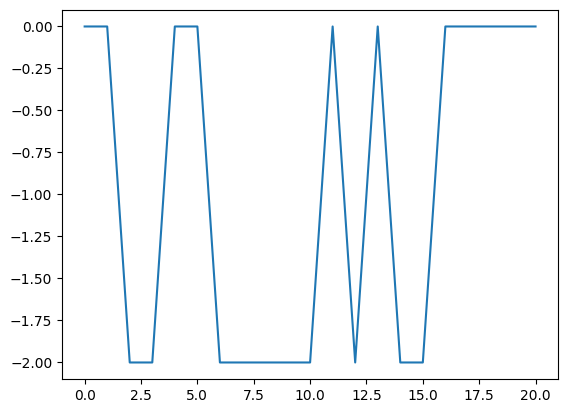

In [88]:
plt.plot((gender - gender[0])/gender.std())

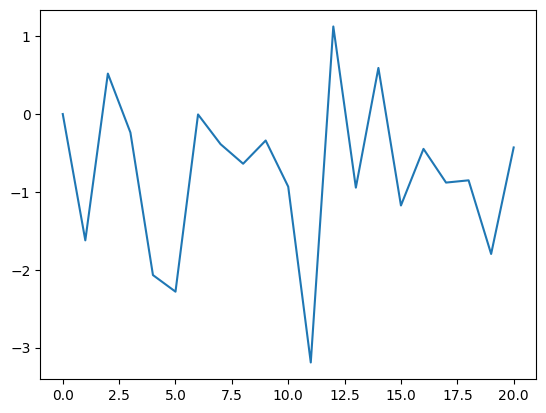

In [87]:
plt.plot((a3 - a3[0])/np.std(a3))

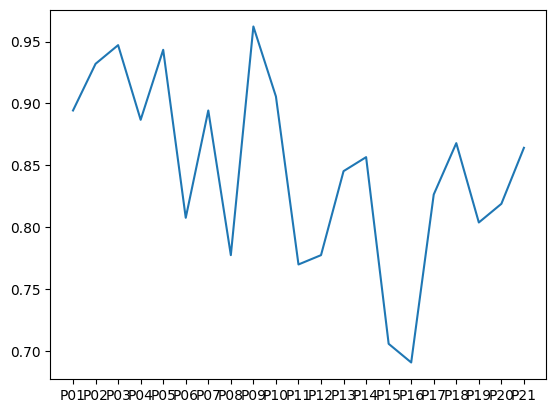

In [30]:
plt.plot(b4)